In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import Counter
import spacy
from wordcloud import WordCloud

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

In [24]:
df = pd.read_csv('datasetFE.csv')
df.head(6)


,Unnamed: 0,Content,Rating,likes,Year_Month,polarity,subjectivity,locations,polarity_words,word_count,days_diff
0,0,"Selection is very poor for Desk, I understand ...",1,0,2021-06,-0.5200,0.780000,NaN,"['is', 'poor', 'understand', 'is', 'has']",21,0
1,1,the website search system is not good.,1,0,2021-05,-0.3500,0.600000,NaN,"['website', 'is', 'good']",7,0
2,2,I tried to purchase last night and it wouldn’t...,1,0,2023-04,-0.1875,0.495139,NaN,"['tried', 'purchase', 'last', 'wouldn', 'using...",25,1
3,3,Y’alls mobile UX is abysmal.,1,0,2022-03,0.0000,0.000000,NaN,"['alls', 'mobile', 'is', 'abysmal']",5,0
4,4,Your prices aren’t close to Target or Amazon f...,1,0,2019-11,0.2500,0.291667,NaN,"['’', 'exact', 'same', 'have', 'bought', 'more']",20,0
5,5,If I don't intend to store my credit card with...,1,0,2024-04,0.0000,0.000000,NaN,"['do', 'intend', 'store', 'have', 'bother']",20,0


In [25]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
def clean_text(text):
    text = text.lower()  # Convertir en minuscule
    text = re.sub(r"\b\w*\d\w*\b", "", text)  # Supprimer les mots contenant des chiffres
    text = re.sub(r"[^\w\s]", "", text)  # Supprimer la ponctuation
    text = re.sub(r"(.)\1{2,}", r"\1", text)  # Supprimer les répétitions de lettres ex: 'aaaa' -> 'a'
    text = " ".join([word for word in text.split() if len(word) > 2])  # Supprimer les mots courts (moins de 3 lettres)
    return text.strip()

def remove_proper_nouns(text):
    doc = nlp(text)
    filtered_words = [token.text for token in doc if token.pos_ != "PROPN"]  # Supprimer les noms propres
    return " ".join(filtered_words)

def keep_only_key_pos(text):
    doc = nlp(text)
    filtered_words = [token.text for token in doc if token.pos_ in ["NOUN", "VERB", "ADJ"]]
    return " ".join(filtered_words)

In [27]:
df["Content_cleaned"] = df["Content"].apply(clean_text)


In [28]:
df["Content_cleaned"] = df["Content_cleaned"].apply(remove_proper_nouns)

In [29]:
df["Content_cleaned"] = df["Content_cleaned"].apply(keep_only_key_pos)

In [30]:
df

,Content,Rating,likes,Year_Month,polarity,subjectivity,locations,polarity_words,word_count,days_diff,Content_cleaned
0,"Selection is very poor for Desk, I understand ...",1,0,2021-06,-0.520000,0.780000,NaN,"['is', 'poor', 'understand', 'is', 'has']",21,0,selection poor desk understand covid factor nfm
1,the website search system is not good.,1,0,2021-05,-0.350000,0.600000,NaN,"['website', 'is', 'good']",7,0,website search system good
2,I tried to purchase last night and it wouldn’t...,1,0,2023-04,-0.187500,0.495139,NaN,"['tried', 'purchase', 'last', 'wouldn', 'using...",25,1,tried purchase last night work using same card...
3,Y’alls mobile UX is abysmal.,1,0,2022-03,0.000000,0.000000,NaN,"['alls', 'mobile', 'is', 'abysmal']",5,0,yalls mobile abysmal
4,Your prices aren’t close to Target or Amazon f...,1,0,2019-11,0.250000,0.291667,NaN,"['’', 'exact', 'same', 'have', 'bought', 'more']",20,0,prices close target amazon exact same merchand...
...,...,...,...,...,...,...,...,...,...,...,...
58120,Zafar was amazing! He was super helpful in hel...,5,0,2025-02,0.616667,0.804167,NaN,"['was', 'amazing', 'was', 'super', 'helping', ...",49,1,amazing helpful helping fjnd compact seater so...
58121,Lee and his manager provided an outstanding se...,5,0,2025-02,0.227187,0.519375,['SCS Kilmarnock'],"['provided', 'outstanding', 'professional', 'g...",70,0,manager provided outstanding service professio...
58122,The delivery drivers were really helpful getti...,5,0,2025-01,0.200000,0.200000,NaN,"['were', 'helpful', 'getting', 'rainy', 'muddy']",17,3,delivery drivers helpful getting sofa house ra...
58123,Sales representative knew stock and products w...,5,0,2025-01,1.000000,1.000000,NaN,"['representative', 'knew', 'felt', 'informed.W...",23,3,sales representative knew stock products felt ...


In [31]:


def clean_text_exclude_stopwords(text):
    doc = nlp(text.lower())  # Tokenisation et minuscule
    filtered_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return filtered_words

In [32]:
# Extraire toute la ponctuation dans la colonne "Content"
df['punctuation'] = df['Content'].apply(lambda x: re.findall(r'[^\w\s]', x))
df[['Content', 'punctuation']].head()

,Content,punctuation
0,"Selection is very poor for Desk, I understand ...","[,, .]"
1,the website search system is not good.,[.]
2,I tried to purchase last night and it wouldn’t...,"[’, ., ., .]"
3,Y’alls mobile UX is abysmal.,"[’, .]"
4,Your prices aren’t close to Target or Amazon f...,"[’, ., .]"


In [33]:
df

,Content,Rating,likes,Year_Month,polarity,subjectivity,locations,polarity_words,word_count,days_diff,Content_cleaned,punctuation
0,"Selection is very poor for Desk, I understand ...",1,0,2021-06,-0.520000,0.780000,NaN,"['is', 'poor', 'understand', 'is', 'has']",21,0,selection poor desk understand covid factor nfm,"[,, .]"
1,the website search system is not good.,1,0,2021-05,-0.350000,0.600000,NaN,"['website', 'is', 'good']",7,0,website search system good,[.]
2,I tried to purchase last night and it wouldn’t...,1,0,2023-04,-0.187500,0.495139,NaN,"['tried', 'purchase', 'last', 'wouldn', 'using...",25,1,tried purchase last night work using same card...,"[’, ., ., .]"
3,Y’alls mobile UX is abysmal.,1,0,2022-03,0.000000,0.000000,NaN,"['alls', 'mobile', 'is', 'abysmal']",5,0,yalls mobile abysmal,"[’, .]"
4,Your prices aren’t close to Target or Amazon f...,1,0,2019-11,0.250000,0.291667,NaN,"['’', 'exact', 'same', 'have', 'bought', 'more']",20,0,prices close target amazon exact same merchand...,"[’, ., .]"
...,...,...,...,...,...,...,...,...,...,...,...,...
58120,Zafar was amazing! He was super helpful in hel...,5,0,2025-02,0.616667,0.804167,NaN,"['was', 'amazing', 'was', 'super', 'helping', ...",49,1,amazing helpful helping fjnd compact seater so...,"[!, !, ., %, +, !, .]"
58121,Lee and his manager provided an outstanding se...,5,0,2025-02,0.227187,0.519375,['SCS Kilmarnock'],"['provided', 'outstanding', 'professional', 'g...",70,0,manager provided outstanding service professio...,"[., ,, ,, ., ., ., ,, ,, &, .]"
58122,The delivery drivers were really helpful getti...,5,0,2025-01,0.200000,0.200000,NaN,"['were', 'helpful', 'getting', 'rainy', 'muddy']",17,3,delivery drivers helpful getting sofa house ra...,[.]
58123,Sales representative knew stock and products w...,5,0,2025-01,1.000000,1.000000,NaN,"['representative', 'knew', 'felt', 'informed.W...",23,3,sales representative knew stock products felt ...,"[., ., .]"


In [34]:
positive_reviews = df[df['polarity'] > 0.5]['Content_cleaned'].apply(clean_text_exclude_stopwords)
negative_reviews = df[df['polarity'] < -0.5]['Content_cleaned'].apply(clean_text_exclude_stopwords)

In [35]:
positive_words = Counter([word for sublist in positive_reviews for word in sublist]).most_common(20)
negative_words = Counter([word for sublist in negative_reviews for word in sublist]).most_common(20)


In [36]:
positive_text = " ".join([word for word, _ in positive_words])
negative_text = " ".join([word for word, _ in negative_words])

Text(0.5, 1.0, '🔵 Word Cloud - Mots fréquents dans les avis positifs ([0.5, 1])')

/Users/baptiste/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  func(*args, **kwargs)
/Users/baptiste/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


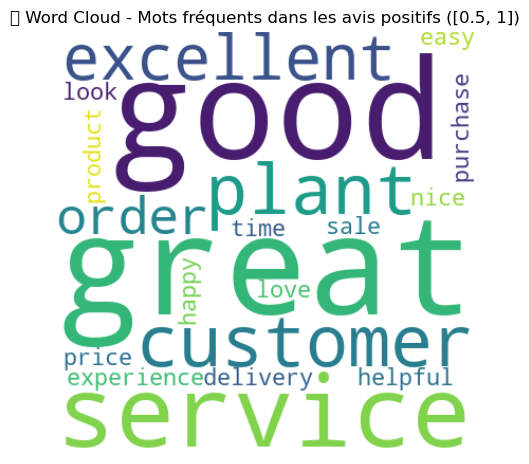

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=400, height=400, background_color="white").generate(positive_text)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("🔵 Word Cloud - Mots fréquents dans les avis positifs ([0.5, 1])")

Text(0.5, 1.0, '🔴 Word Cloud - Mots fréquents dans les avis négatifs ([-0.5, -1])')

/Users/baptiste/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  func(*args, **kwargs)
/Users/baptiste/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


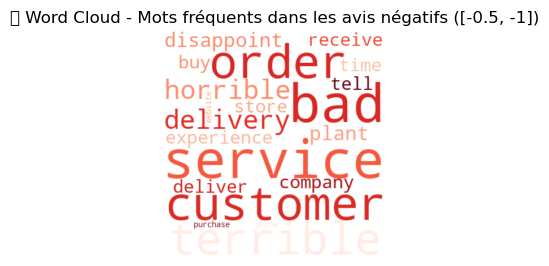

In [38]:
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=400, height=400, background_color="white", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("🔴 Word Cloud - Mots fréquents dans les avis négatifs ([-0.5, -1])")

<Axes: title={'center': 'Distribution des notes'}>

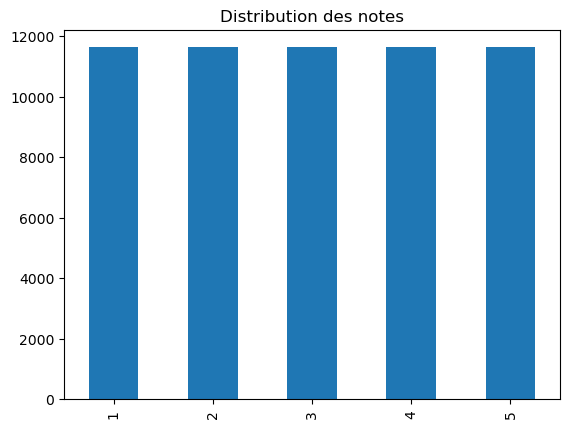

In [39]:
df['Rating'].value_counts().plot(kind="bar", title="Distribution des notes")

In [40]:
def lemmatize_text(text):
    if not isinstance(text, str):  # Vérifier si `text` est bien une chaîne de caractères
        return []  # Retourner une liste vide si `text` est NaN ou float
    doc = nlp(text.lower())  # Tokenisation + minuscule
    lemmatized_words = [token.lemma_ for token in doc if not token.is_stop]
    return lemmatized_words  # Retourne une liste de mots lemmatisés

# Ajouter les colonnes tokenisées et lemmatisées
df['tokenized'] = df['Content_cleaned'].apply(clean_text_exclude_stopwords)


In [41]:
df['lemmatized'] = df['Content_cleaned'].apply(lemmatize_text)

df[['Content', 'tokenized', 'lemmatized']].head()

,Content,tokenized,lemmatized
0,"Selection is very poor for Desk, I understand ...","[selection, poor, desk, understand, covid, fac...","[selection, poor, desk, understand, covid, fac..."
1,the website search system is not good.,"[website, search, system, good]","[website, search, system, good]"
2,I tried to purchase last night and it wouldn’t...,"[try, purchase, night, work, card, sure, wrong...","[try, purchase, night, work, card, sure, wrong..."
3,Y’alls mobile UX is abysmal.,"[yall, mobile, abysmal]","[yall, mobile, abysmal]"
4,Your prices aren’t close to Target or Amazon f...,"[price, close, target, amazon, exact, merchand...","[price, close, target, amazon, exact, merchand..."


In [42]:
df.to_csv('datasetAvantML.csv', index=False)